<h1>Module 16 Project - John Kelleher</h1>

Use the code below to help you analyze the data returned by the MBTA API:

In [1]:
mbtaURL = "https://api-v3.mbta.com/vehicles?filter[route]=1&include=trip"

import urllib.request, json
with urllib.request.urlopen(mbtaURL) as url:
    data = json.loads(url.read().decode())
   
    with open('data.json', 'w') as outfile:
        json.dump(data, outfile)
   
    with open('data.txt', 'w') as outfile:
        json.dump(json.dumps(data, indent=4, sort_keys=True), outfile)
       
    print(json.dumps(data, indent=4, sort_keys=True))


{
    "data": [
        {
            "attributes": {
                "bearing": 312,
                "current_status": "IN_TRANSIT_TO",
                "current_stop_sequence": 19,
                "direction_id": 0,
                "label": "1914",
                "latitude": 42.36672834,
                "longitude": -71.10587719,
                "occupancy_status": "MANY_SEATS_AVAILABLE",
                "speed": null,
                "updated_at": "2023-03-15T00:46:06-04:00"
            },
            "id": "y1914",
            "links": {
                "self": "/vehicles/y1914"
            },
            "relationships": {
                "route": {
                    "data": {
                        "id": "1",
                        "type": "route"
                    }
                },
                "stop": {
                    "data": {
                        "id": "104",
                        "type": "stop"
                    }
                },
                "t

Use the code below to read the data from your MySQL database and store it in a pandas dataframe.  

You you need to install pymysql to run the code:

pip install pymysql

In [2]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import pymysql
import pandas as pd

host = '127.0.0.1'
port = '3306'
user = 'root'
password = 'MyNewPass'
database = 'MBTAdb'

conn = pymysql.connect(
    host=host,
    port=int(3306),
    user="root",
    passwd=password,
    db=database,
    charset='utf8mb4')

df = pd.read_sql_query("SELECT * FROM mbta_buses",
    conn)

df.tail(10)

/Users/johnkelleher1/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,record_num,id,latitude,longitude,current_status,current_stop_sequence,direction_id,occupancy_status,speed
39240,39241,y1914,42.342851,-71.085105,IN_TRANSIT_TO,14.0,1,MANY_SEATS_AVAILABLE,None
39241,39242,y1831,42.357965,-71.093022,IN_TRANSIT_TO,15.0,0,None,None
39242,39243,y1914,42.342264,-71.084299,IN_TRANSIT_TO,14.0,1,MANY_SEATS_AVAILABLE,None
39243,39244,y1831,42.358248,-71.093138,IN_TRANSIT_TO,15.0,0,None,None
39244,39245,y1914,42.341900,-71.083662,IN_TRANSIT_TO,15.0,1,MANY_SEATS_AVAILABLE,None
39245,39246,y1831,42.359137,-71.093597,IN_TRANSIT_TO,15.0,0,None,None
39246,39247,y1914,42.341499,-71.083157,IN_TRANSIT_TO,15.0,1,MANY_SEATS_AVAILABLE,None
39247,39248,y1831,42.359413,-71.093826,IN_TRANSIT_TO,15.0,0,None,None
39248,39249,y1914,42.341521,-71.083154,IN_TRANSIT_TO,15.0,1,MANY_SEATS_AVAILABLE,None
39249,39250,y1831,42.358580,-71.093280,IN_TRANSIT_TO,15.0,0,None,None



The code below saves the data as a csv file to the local directory as a backup.

In [4]:

df.to_csv('mbta.csv')

In [9]:
import pandas as pd
df = pd.read_csv('/Users/johnkelleher1/Module_16/mbta2.csv', index_col=[0], usecols = [i for i in range(14)])
df

/var/folders/84/xd54bgq55g165kkt07htf7n80000gp/T/ipykernel_28298/2813182097.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/johnkelleher1/Module_16/mbta2.csv', index_col=[0], usecols = [i for i in range(14)])


,record_num,route_number,id,bearing,current_status,current_stop_sequence,direction_id,label,latitude,longitude,occupancy_status,speed,updated_at
4526,4527,1,y1906,0,IN_TRANSIT_TO,13.0,0,1906,42.347052,-71.087563,MANY_SEATS_AVAILABLE,NaN,3/14/23 16:57
4527,4528,1,y1874,0,IN_TRANSIT_TO,18.0,1,1874,42.334613,-71.074805,MANY_SEATS_AVAILABLE,NaN,3/14/23 16:57
4528,4529,1,y1847,0,IN_TRANSIT_TO,7.0,1,1847,42.364791,-71.102789,MANY_SEATS_AVAILABLE,NaN,3/14/23 16:57
4529,4530,1,y1775,237,IN_TRANSIT_TO,11.0,1,1775,42.349772,-71.089176,MANY_SEATS_AVAILABLE,NaN,3/14/23 16:57
4530,4531,1,y1754,331,IN_TRANSIT_TO,14.0,0,1754,42.350616,-71.089281,FEW_SEATS_AVAILABLE,NaN,3/14/23 16:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45877,45878,1,y1858,135,IN_TRANSIT_TO,19.0,1,1858,42.333630,-71.073640,MANY_SEATS_AVAILABLE,NaN,3/15/23 16:57
45878,45879,1,y1825,127,IN_TRANSIT_TO,8.0,1,1825,42.362688,-71.099348,FEW_SEATS_AVAILABLE,NaN,3/15/23 16:57
45879,45880,1,y1789,0,IN_TRANSIT_TO,12.0,0,1789,42.345316,-71.086662,FEW_SEATS_AVAILABLE,NaN,3/15/23 16:57
45880,45881,1,y1760,311,IN_TRANSIT_TO,19.0,0,1760,42.365935,-71.104710,MANY_SEATS_AVAILABLE,NaN,3/15/23 16:57


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41356 entries, 4526 to 45881
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   record_num             41356 non-null  int64  
 1   route_number           41356 non-null  int64  
 2   id                     41356 non-null  object 
 3   bearing                41356 non-null  int64  
 4   current_status         41356 non-null  object 
 5   current_stop_sequence  41294 non-null  float64
 6   direction_id           41356 non-null  int64  
 7   label                  41356 non-null  object 
 8   latitude               41356 non-null  float64
 9   longitude              41356 non-null  float64
 10  occupancy_status       38535 non-null  object 
 11  speed                  0 non-null      float64
 12  updated_at             41356 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 4.4+ MB


<h1>What is the average time it takes for a bus to complete the route</h1>

In [39]:
from array import array
from datetime import datetime, timedelta

num_buses = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
direction = [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]
outbound = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
inbound = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
start_stop = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
start_time = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
end_stop = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
end_time = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

# keep totals of times and numbers of inbound and outbound trips for each bus
bus_ids = []
for bus_id in df.id:
    if bus_id not in bus_ids:
        bus_ids.append(bus_id)

for i in range(4526, 32000):
    bus_num = bus_ids.index(df.id[i])
    num_buses[bus_num] += 1
    
    # set totals for buses that are on first trip
    if direction[bus_num] == -1:
        direction[bus_num] = df.direction_id[i]
        start_stop[bus_num] = df.current_stop_sequence[i]
        start_time[bus_num] = df.updated_at[i]
        if df.direction_id[i] == 0 and (df.current_stop_sequence[i] == 1 or df.current_stop_sequence[i] == 2):
            outbound[bus_num] += 1
        elif df.direction_id[i] == 1 and (df.current_stop_sequence[i] == 1 or df.current_stop_sequence[i] == 2):
            inbound[bus_num] += 1
    
    # add counts for outbound buses
    if df.direction_id[i] == 0 and direction[bus_num] == 1:
        outbound[bus_num] += 1
        direction[bus_num] = 0
        end_stop[bus_num] = df.current_stop_sequence[i]
        end_time[bus_num] = df.updated_at[i]
    
    # add counts for inbound buses
    elif df.direction_id[i] == 1 and direction[bus_num] == 0:
        inbound[bus_num] += 1
        direction[bus_num] = 1
        end_stop[bus_num] = df.current_stop_sequence[i]
        end_time[bus_num] = df.updated_at[i]
    
    # reset bus
    else:
        direction[bus_num] = df.direction_id[i]
        end_stop[bus_num] = df.current_stop_sequence[i]
        
# Get total trips and times in Eastern Standard Time
total_trips = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
total_time = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
average_time = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
start_time_EST = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
end_time_EST = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
average_time_in_minutes = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
total_average_minutes = 0
total_average_time = 0

for i in range(0, 15):
    start_time_EST[i] = datetime.strptime(start_time[i], '%m/%d/%y %H:%M') - timedelta(hours=4)
    end_time_EST[i] = datetime.strptime(end_time[i], '%m/%d/%y %H:%M') - timedelta(hours=4)
        
for i in range(0, 15):
    total_trips[i] = outbound[i] + inbound[i]
    total_time[i] = end_time_EST[i] - start_time_EST[i]
    average_time[i] = total_time[i]/total_trips[i]
    
for i in range(0, 15):
    average_time_in_minutes[i] = average_time[i]/pd.Timedelta(minutes=1)  
    total_average_minutes = total_average_minutes + average_time_in_minutes[i]
total_average_time = total_average_minutes/15
print("The average time it takes a bus to complete a route is", round(total_average_time, 2), "minutes.")


The average time it takes a bus to complete a route is 41.28 minutes.


<h1>Provide a Visualization based on the data</h1>

/var/folders/84/xd54bgq55g165kkt07htf7n80000gp/T/ipykernel_28298/712315265.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(buses, rotation = 45)


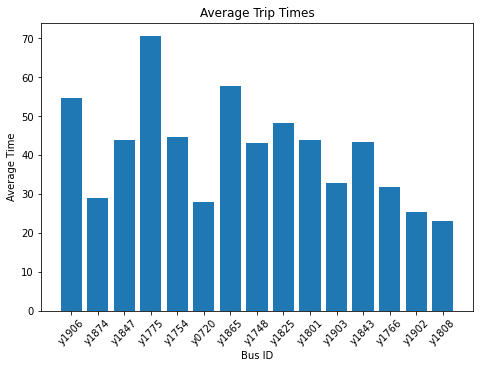

In [37]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
buses = []
avgtimes = []
for i in range(0, 15):
    buses.append(bus_ids[i])
    avgtimes.append(average_time_in_minutes[i])
ax.bar(buses,avgtimes)
plt.title('Average Trip Times')
plt.xlabel('Bus ID')
plt.ylabel('Average Time')
ax.set_xticklabels(buses, rotation = 45)
plt.show()

<h1>Give an estimate of the speed of the bus from current_stop_sequence = 1 to the last  current_stop_sequence. </h1> 

Note: You can use the haversine Python library to calculate the distance between two points, given two longitude and latitude coordinates.

In [15]:
!pip install haversine

In [33]:
import haversine as hs
from haversine import Unit
nubian=(42.3301,-71.0841)
harvard=(42.3730,-71.1173)
route_distance = hs.haversine(nubian,harvard,unit=Unit.MILES)
print("The distance between Nubian and Harvard Square is about",round(route_distance, 2), "miles.")
print("The round trip distance is about", round(2*route_distance, 2), "miles.")
print("The average speed is", round((2*route_distance)/(total_average_time/60),2),"about miles per hour.")

The distance between Nubian and Harvard Square is about 3.41 miles.
The round trip distance is about 6.83 miles.
The average speed is 9.93 about miles per hour.
